In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [7]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [8]:
top_10.head()

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81


In [9]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [10]:
plt.style.use('seaborn')

In [11]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

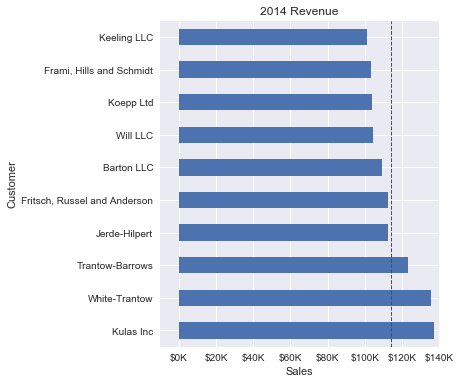

In [12]:
fig,ax = plt.subplots(figsize=(5,6))
top_10.plot(kind='barh',x='Name',y='Sales',ax=ax)

ax.set_xlim([-10000,140000])
ax.set(
    title='2014 Revenue',
    xlabel='Sales',
    ylabel='Customer'
)
ax.axvline(x=top_10['Sales'].mean(),color='r',label='Average',linestyle='--',linewidth=1)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

plt.show()

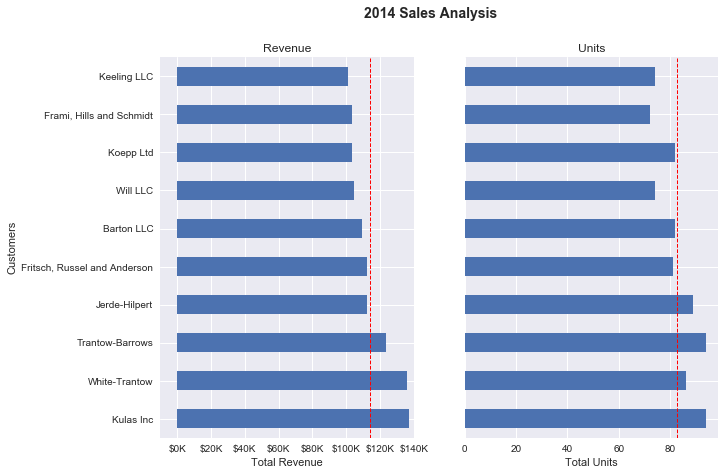

In [26]:
fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,7))
top_10.plot(kind='barh',x='Name',y='Sales',ax=ax[0])
ax[0].set_xlim([-10000,140000])
ax[0].set(title='Revenue',xlabel='Total Revenue',ylabel='Customers')
ax[0].legend().set_visible(False)
formatter = FuncFormatter(currency)
ax[0].xaxis.set_major_formatter(formatter)
ax[0].axvline(x=top_10['Sales'].mean(),color='r',linestyle='--',linewidth=1)

top_10.plot(kind='barh',x='Name',y='Purchases',ax=ax[1])
ax[1].set(title='Units',xlabel='Total Units',ylabel='')
ax[1].legend().set_visible(False)
ax[1].axvline(x=top_10['Purchases'].mean(),color='r',linestyle='--',linewidth=1)

fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

plt.show()



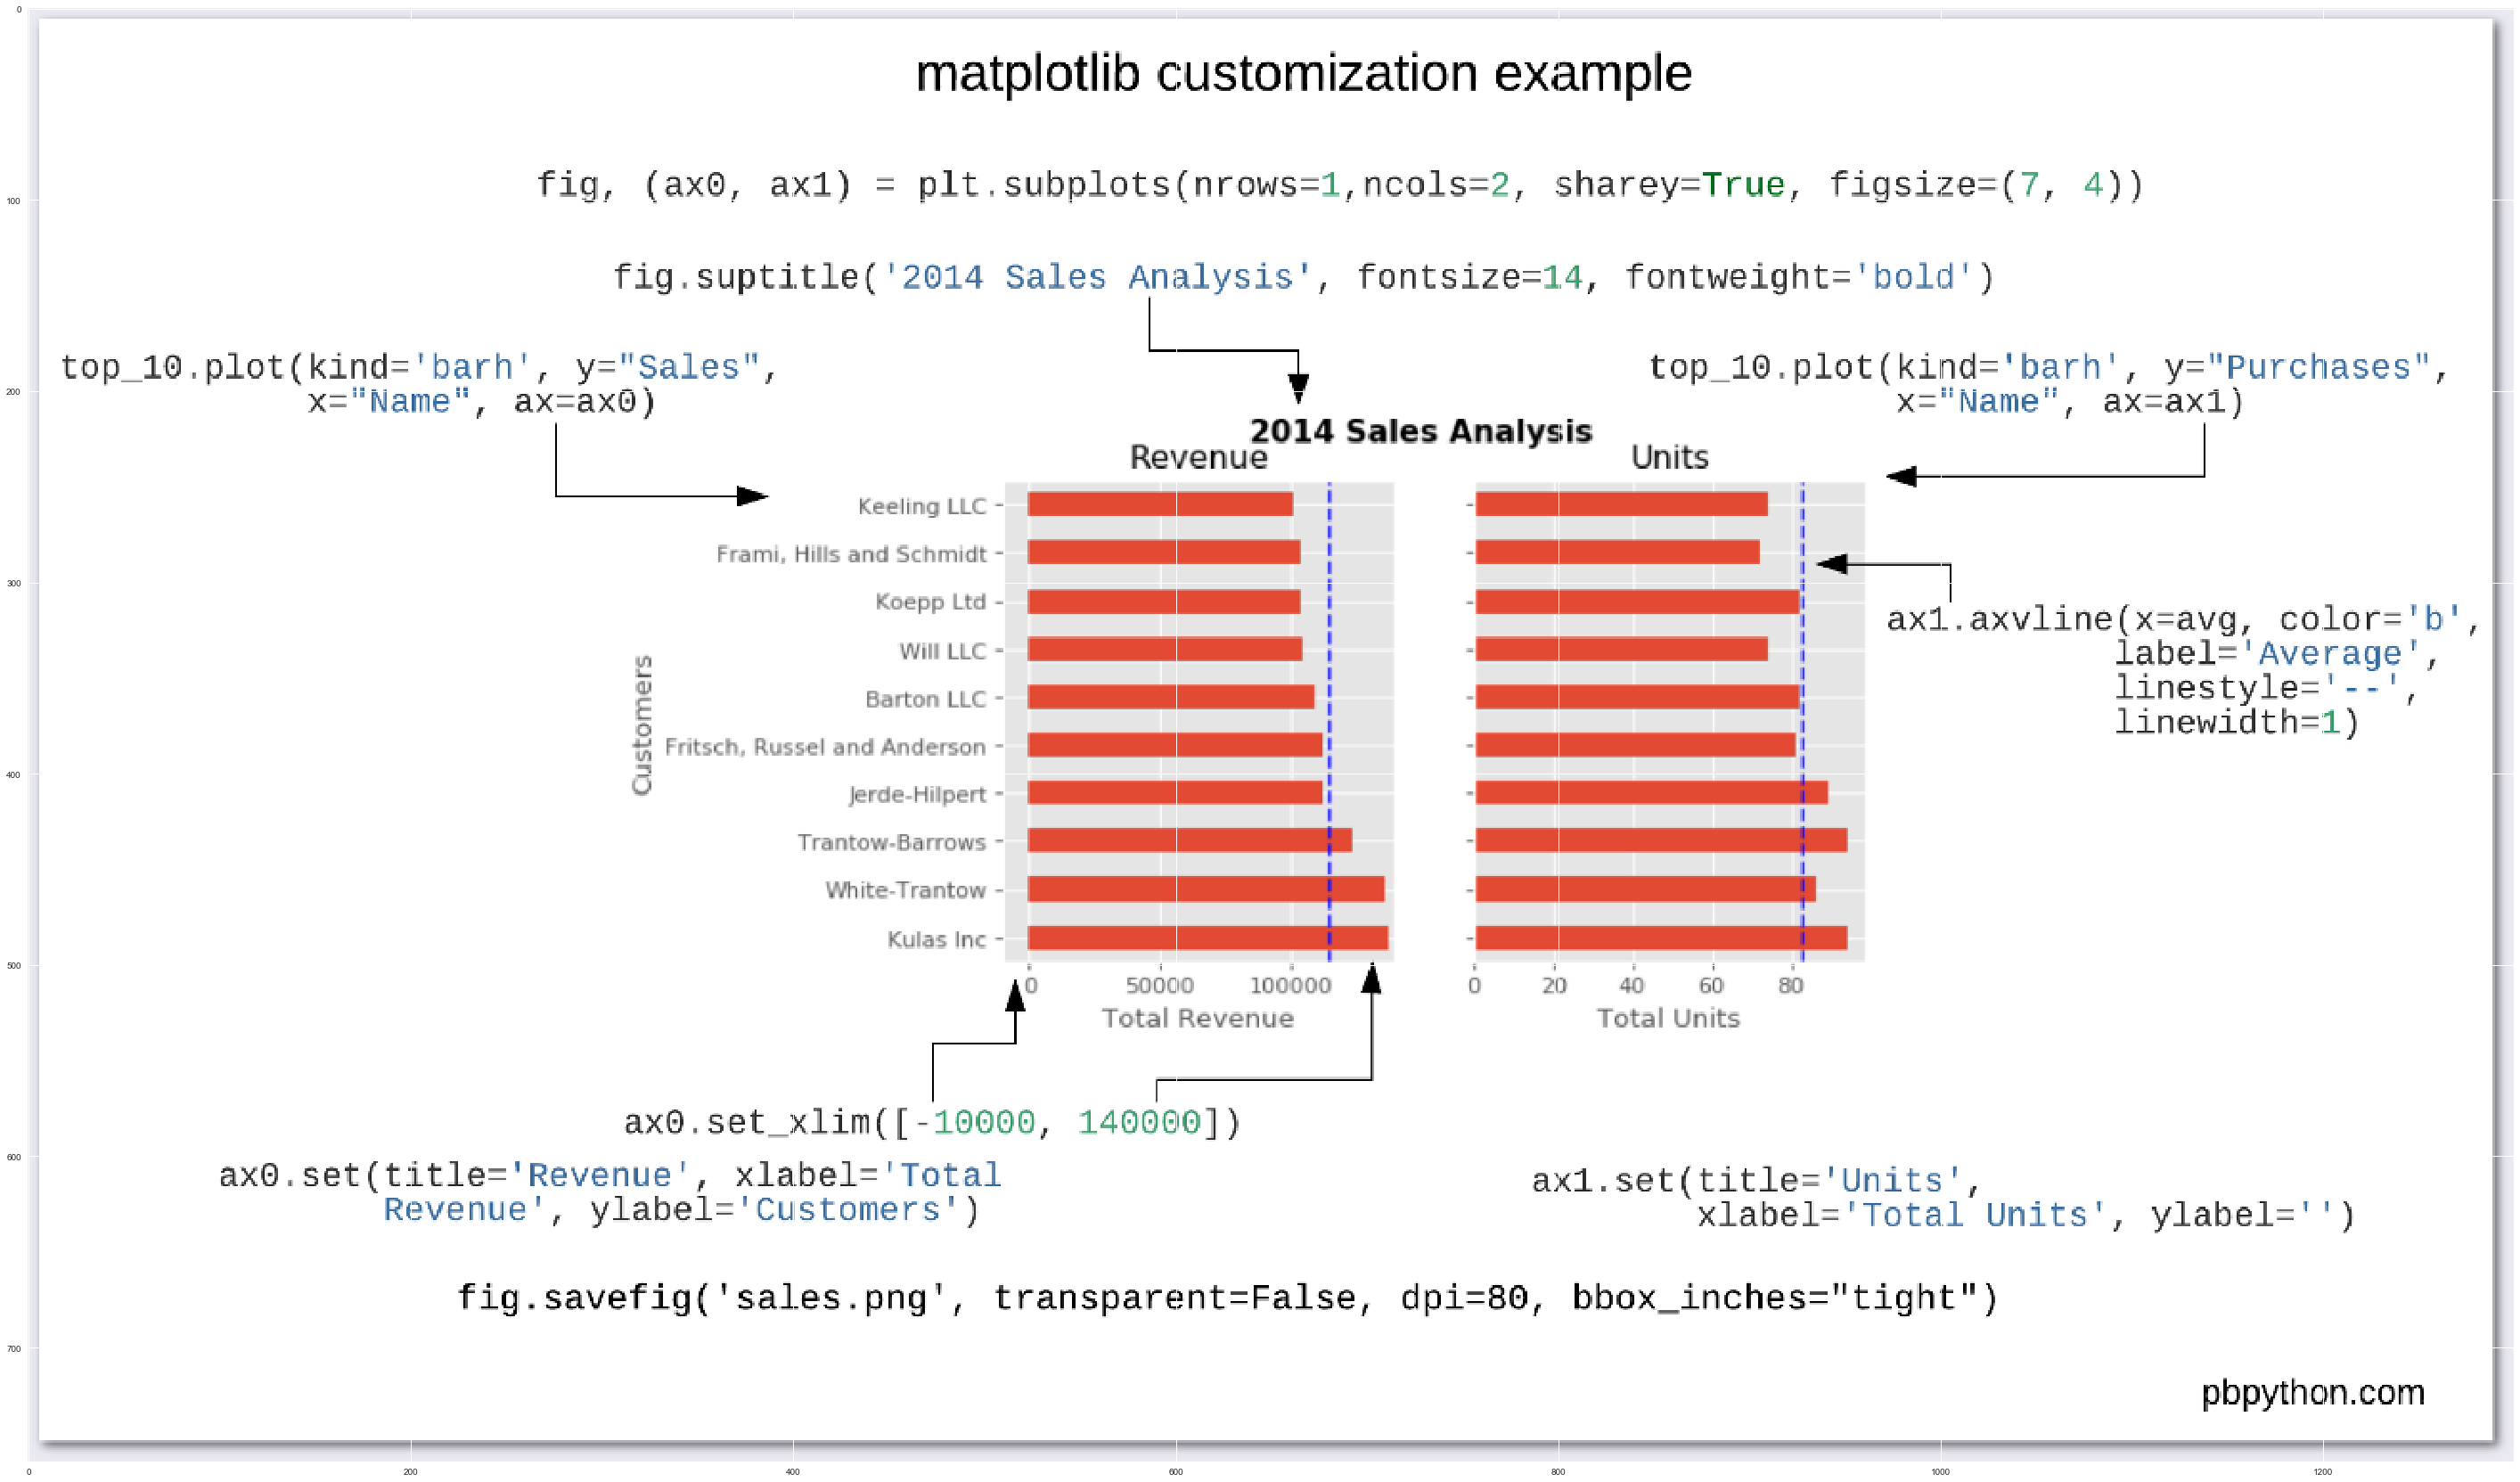

In [32]:
fig,ax = plt.subplots(figsize=(50,50))
img = mpimg.imread('matplotlib-pbpython-example.png')
plt.imshow(img)
plt.show()